In [1]:
# import libraries

import random
import math
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [2]:
# Grid-Search Part

In [3]:
#Hydraulic head measurements

time = 7 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head7 = [-0.102488214832666, -0.256410491553362, -0.213669206729949, -0.483401683067052, -0.243068241621553, -0.311217243417387, -0.0644217683867324, -0.0772257784637896, -0.0603414471556082, -0.0334897934057921]


time = 10 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head10 = [0.443999406954099, 0.707356086196896, 0.303188299476753, 0.434854619375683, 0.399381989561914, 0.0671645178582093, 0.181871866404912, -0.00516329217097165, -0.171663585230874, -0.250824777480790]

time = 25 #days 
x = [1,11,21,31,41,51,61,71,81,91]#m
head25 = [-0.371461399773691, -0.311394297727547, 0.0366151360819552, 0.0611240611861598, 0.306417078570019, 0.283762317677219, 0.192870096397016, 0.0533317081309611, 0.183152310977500, 0.107895715430948]

time = 50 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head50 = [0.782927857935940, 0.609881412988871, 0.113570122237571, -0.00568864797838272, -0.160172200979472, -0.127889705676206, -0.00387621599071414, 0.00690596442957636, -0.00207478866324770, -0.282535147150022]

time = 180 #days 
x = [1,11,21,31,41,51,61,71,81,91]#m
head180 = [-0.976539641786550, -0.577920831537149, -0.308098743266651, -0.0949955682304036, -0.00877293988316697, 0.0336866533831244, 0.167401153463919, -0.0773048945381665, 0.0780282510863342, -0.167658892045170]

t = [7, 10, 25, 50, 180]
head_obs_list = [head7, head10, head25, head50, head180]
head_obs = np.array(head_obs_list)
#head_obs = np.array(head_obs)
print(head_obs[1,5])
head_obs_array = np.concatenate([head7,head10, head25, head50, head180])

0.0671645178582093


In [4]:
def calculate_hxt_for_one_variable(D_input, A_input, w_input, x_input, t_input):
  fun1 = A_input * math.exp(-x_input * math.sqrt(w_input / (2*D_input)))
  fun2 = math.sin(-x_input * math.sqrt((w_input / (2*D_input)) + ((w_input * t_input) )))
  return fun1 * fun2

In [5]:
#ranges for parameters

# I increased the step size from 4 to 10.

steps= 10 #steps for the grid search method

b = 10 # saturated thicknes in meter
sy = 0.25 # specific yeld 
K_exp_min = 0
K_exp_max = 2
K_skalar = 8.64  #[m/d]
K_exp_lin = np.linspace(K_exp_min, K_exp_max, steps)
K = np.power(K_skalar, K_exp_lin)
D = ((K * b) / sy)
print(D)

A_exp_min = -1
A_exp_max = 1
A_exp_lin = np.linspace(A_exp_min, A_exp_max, steps)
A = np.power(5, A_exp_lin)
print(A)

w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w = np.linspace(w_min, w_max, steps)
print(w)



[  40.           64.59131946  104.30096374  168.42342172  271.96727592
  439.16813004  709.16122461 1145.14148018 1849.15497932 2985.984     ]
[0.2        0.28599383 0.40896235 0.58480355 0.83625103 1.19581317
 1.70997595 2.44521285 3.49657893 5.        ]
[0.8975979  1.14693065 1.3962634  1.64559615 1.8949289  2.14426165
 2.3935944  2.64292715 2.8922599  3.14159265]


In [8]:
#go through all combinations, take difference from the measurements and find best parameters for all combinations of x and t

best_current_difference = np.inf

for c,Dlin in enumerate(D):
    for d,Alin in enumerate(A):
         for e,wlin in enumerate(w):
                    h_combinations = []
                    for a,T in enumerate(t):
                        for b,X in enumerate(x):
                            h_combinations.append(calculate_hxt_for_one_variable(Dlin, Alin, wlin, X, T))
                                
                    difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array))) 
                    #print(difference_current)
                    
                    
                    if difference_current <= best_current_difference:  
                        best_current_combination = [Dlin, Alin, wlin,]
                        best_current_difference = difference_current
                        #print(best_current_combination)
print(best_current_combination)
print(best_current_difference/50)

[104.30096373910334, 0.5848035476425731, 2.39359440273508]
0.19893213644008778


In [9]:
h_values_gridsearch = []
for a,T in enumerate(t):
    for b,X in enumerate(x):
        h_values_gridsearch.append(calculate_hxt_for_one_variable(best_current_combination[0],best_current_combination[1],best_current_combination[2], X, T))

In [10]:
print(h_values_gridsearch)
len(h_values_gridsearch)

[0.4283173914225131, -0.15698111524239539, 0.056681795956656955, -0.020193206675666143, 0.0071051604839626374, -0.0024707632415725033, 0.0008494305756293782, -0.0002887345110162787, 9.702082331806923e-05, -3.221273196257792e-05, 0.5167947920027633, 0.07383044758280655, -0.04856445935302242, -0.016621458655869475, 0.0029774295157127427, 0.002438697354460345, 5.001801683488426e-05, -0.00027804933764740883, -5.141950605415032e-05, 2.4212866402660076e-05, -0.5217685818231907, 0.049226592166851435, 0.04827484781317167, -0.018495207430510058, -0.0007940194684799163, 0.0023800534521174867, -0.0005337877312888081, -0.00013874205490647956, 9.92028590916376e-05, -9.848465461879361e-06, 0.5245974850271258, -0.1477957165865018, 0.024639756739701767, 0.0029743174213010927, -0.0046271277878848095, 0.002350059349123914, -0.0008277637234861635, 0.00020702540456003532, -2.3606322893376385e-05, -1.0529264015470067e-05, -0.4958838321268324, -0.152223148926447, -0.04344219592310492, -0.011141202572064402,

50

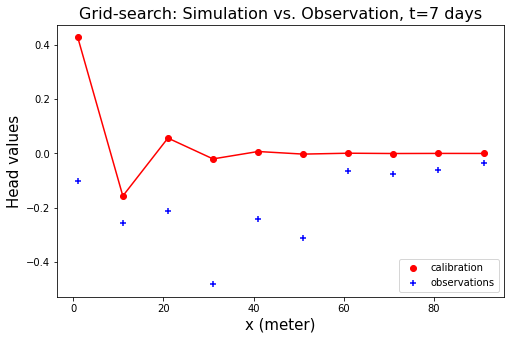

In [11]:
# initialize x and y coordinates
y = h_values_gridsearch[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=7 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

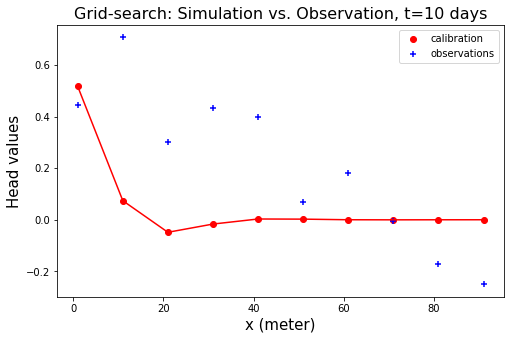

In [12]:
# initialize x and y coordinates
y = h_values_gridsearch[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=10 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

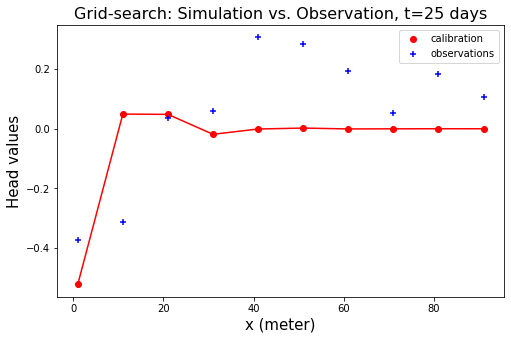

In [13]:
# initialize x and y coordinates
y = h_values_gridsearch[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=25 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

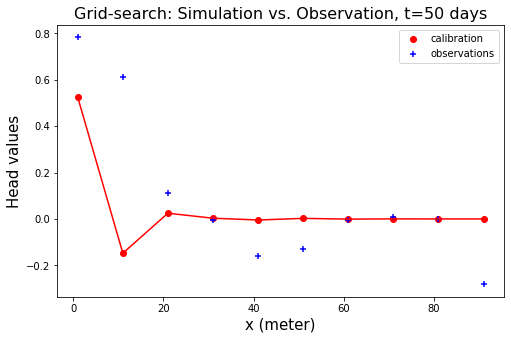

In [14]:
# initialize x and y coordinates
y = h_values_gridsearch[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=50 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

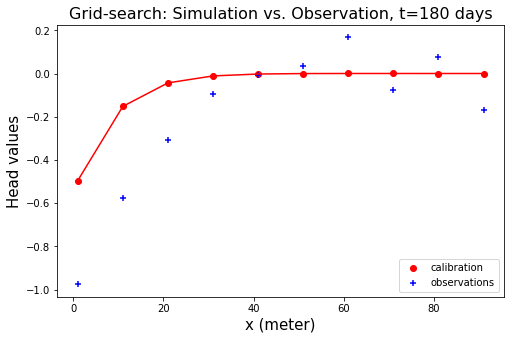

In [15]:
# initialize x and y coordinates
y = h_values_gridsearch[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=180 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

In [14]:
# Monte Carlo Part

In [16]:
#Define the parameters (by using random numbers)
np.random.seed(123)
steps= 10

K_exp_min = 0
K_exp_max = 2
K_skalar = 8.64  #[m/d]
K_exp_MC = np.random.uniform(K_exp_min, K_exp_max, steps)
K_MC = np.power(K_skalar, K_exp_MC)
D_MC = ((K_MC * b) / sy)
print(D_MC)

A_MC = 5**np.random.uniform(-1, 1, size=steps)
print(A_MC)

w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w_MC = np.random.uniform(w_min, w_max, size=steps)
print(w_MC)



[ 725.78573456  123.66572265   95.76383028  388.08800171  801.47071037
  223.25054597 2473.4367011   690.25160262  286.48452694  195.32120264]
[0.60363203 2.09024768 0.82059276 0.24235731 0.72023129 2.1513115
 0.35986738 0.3518042  1.10689628 1.10788085]
[2.32119032 2.80371839 2.52327185 2.26873145 2.51875706 1.62231601
 1.70944975 1.40981939 1.55669068 2.31350501]


In [18]:
#go through all combinations, take difference from the measurements and find best parameters for all combinations of x and t

best_current_difference = np.inf

for c,Dlin in enumerate(D_MC):
    for d,Alin in enumerate(A_MC):
         for e,wlin in enumerate(w_MC):
                    h_combinations = []
                    for a,T in enumerate(t):
                        for b,X in enumerate(x):
                            h_combinations.append(calculate_hxt_for_one_variable(Dlin, Alin, wlin, X, T))
                                
                    difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array))) 
                    #print(difference_current)
                    
                    
                    if difference_current <= best_current_difference:  
                        best_current_combination = [Dlin, Alin, wlin]
                        best_current_difference = difference_current
                        #print(best_current_combination)
print(best_current_combination)
print(best_current_difference/50)
                       
     

[801.4707103665493, 0.7202312905206467, 2.5232718484800687]
0.16799747685257352


In [19]:
h_values_MC = []
for a,T in enumerate(t):
    for b,X in enumerate(x):
        h_values_MC.append(calculate_hxt_for_one_variable(best_current_combination[0],best_current_combination[1],best_current_combination[2], X, T))

In [20]:
print(h_values_MC)

[0.6043039466851893, -0.3622781158763476, -0.09149046960846725, 0.20975597099694462, -0.06388858746702109, -0.06280063586096539, 0.060410208657543964, -0.001914878017618784, -0.026359778238405157, 0.014094600364968072, 0.6590112746941424, 0.44748071489654523, 0.30351651191631274, 0.20564818572942647, 0.13919028487157475, 0.0941109828259468, 0.06356585496690041, 0.04289074230167632, 0.028910943923782875, 0.019468032442596813, -0.6895047523175556, 0.26171411290505675, 0.08897146879645189, -0.1941239147323874, 0.12506638643990922, -0.01870559974733616, -0.04063321862911905, 0.04306045152674515, -0.01829112046083149, -0.00389865655659293, 0.672905657800256, 0.39991629421735175, 0.08030385778019396, -0.10362975884225907, -0.13598588488589802, -0.0839203815500818, -0.019212078738715156, 0.01947569359671164, 0.02741990539615122, 0.0175637243426239, -0.4349385556765649, -0.43221080086818103, -0.31040354446576135, -0.1687226199300177, -0.05757840322244232, 0.008749623633131906, 0.03630585738000

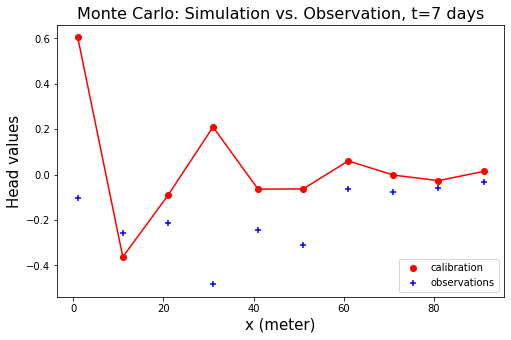

In [21]:
# initialize x and y coordinates
y = h_values_MC[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=7 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

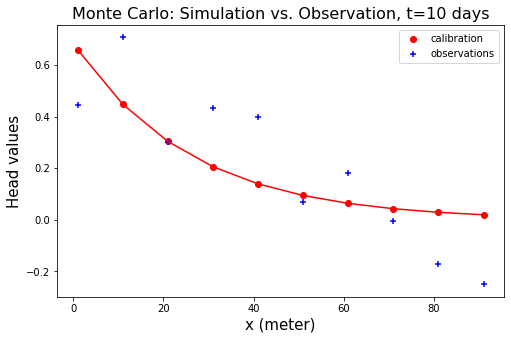

In [22]:
# initialize x and y coordinates
y = h_values_MC[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=10 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

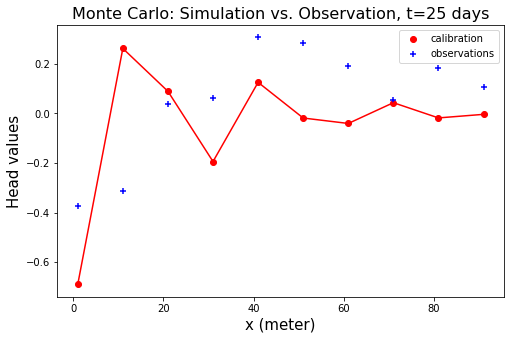

In [23]:
# initialize x and y coordinates
y = h_values_MC[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=25 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

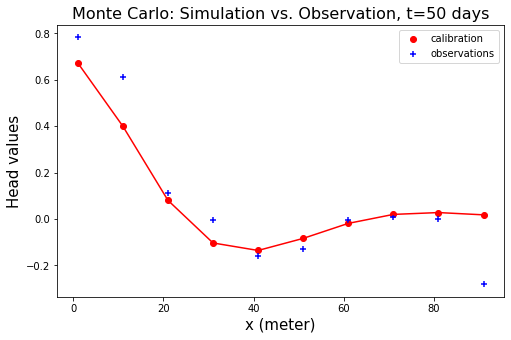

In [24]:
# initialize x and y coordinates
y = h_values_MC[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=50 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

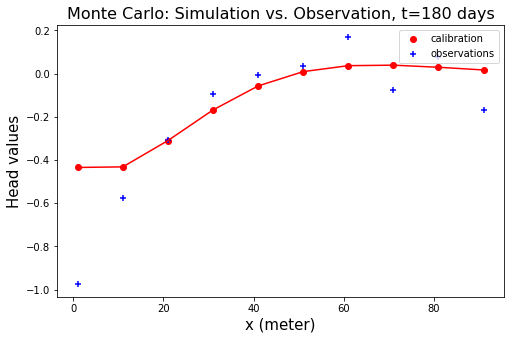

In [25]:
# initialize x and y coordinates
y = h_values_MC[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=180 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

In [65]:
# I am still trying to write a loss function that we have to minimize.
# We will use this function as the first parameter in scipy library. For details, please see the references.

'''
Reference:
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead
'''


'\nReference:\nhttps://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html\nhttps://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead\n'

In [26]:
#Define an objective function that we want to minimize

#initial_parameter = [43.12779010783523, 1.052992921683777, 0.25993138281437717, 1.7942379459878974]
initial_parameter_Grid_Search = [104.30096373910334, 0.5848035476425731, 2.39359440273508]
initial_parameter_Monte_Carlo = [801.4707103665493, 0.7202312905206467, 2.5232718484800687]

def objective_function(parameters):
  D = parameters[0]
  A = parameters[1]
  omega = parameters[2]

  absolute = 0

  for a,T in enumerate(t):
    for b,X in enumerate(x):
      head = calculate_hxt_for_one_variable(D, A, omega, X, T)
      
      absolute += np.abs(head_obs[a,b] - head)

  return absolute

In [27]:
error_Grid_Search = scipy.optimize.minimize(objective_function, initial_parameter_Monte_Carlo, method = 'Nelder-Mead')

Best_D_NM = error_Grid_Search.x[0]
Best_A_NM = error_Grid_Search.x[1]
Best_Omega_NM = error_Grid_Search.x[2]

#print(error)

print(Best_D_NM)
print(Best_A_NM)
print(Best_Omega_NM)

1043.7800585616715
0.6428517004561969
2.521405122688878


In [30]:
h_combinations = []
for a,T in enumerate(t):
  for b,X in enumerate(x):
    h_combinations.append(calculate_hxt_for_one_variable(Best_D_NM, Best_A_NM, Best_Omega_NM, X, T))
                                
difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array)))
print(difference_current/50)

0.16604688629261438


In [31]:
h_values_NM = []
for a,T in enumerate(t):
  for b,X in enumerate(x):
     h_values_NM.append(calculate_hxt_for_one_variable(Best_D_NM ,Best_A_NM, Best_Omega_NM, X, T))

In [32]:
print(h_values_NM)

[0.5415557982291843, -0.3461349344739772, -0.0805572629557314, 0.21688346969703798, -0.0786618218979527, -0.06512228551769733, 0.07494538535641666, -0.008575354519750255, -0.03270079444443345, 0.022201071132659036, 0.5914701234204504, 0.4240526141330972, 0.3031882976396313, 0.2161918509255141, 0.15375244347240485, 0.10906259788956056, 0.07716316313570648, 0.05445377851960139, 0.03832900307181015, 0.026909177336277897, -0.6186226589998879, 0.25827541810729904, 0.06942612069331583, -0.19321152302773403, 0.14436221465532711, -0.03733036901170374, -0.037455884404713924, 0.053331708198374295, -0.030719389081011315, 0.0018466952175659375, 0.6041762692211677, 0.36611298401646164, 0.05297219687154775, -0.13141507094335986, -0.15367397361015325, -0.08320947021953497, -0.003876211640233382, 0.03777156485646341, 0.03850561254044246, 0.01843255593824622, -0.393925853298341, -0.41983036480841035, -0.29636930690730223, -0.13847754571723328, -0.014697165333534337, 0.05184841282159106, 0.0682133558665

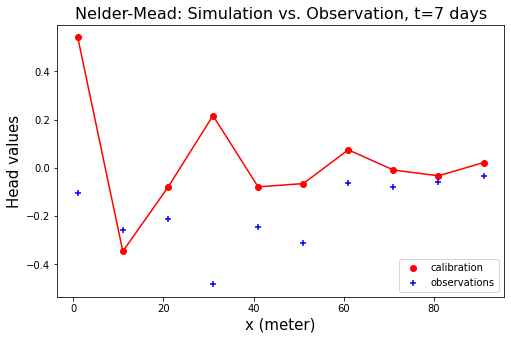

In [33]:
# initialize x and y coordinates
y = h_values_NM[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=7 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

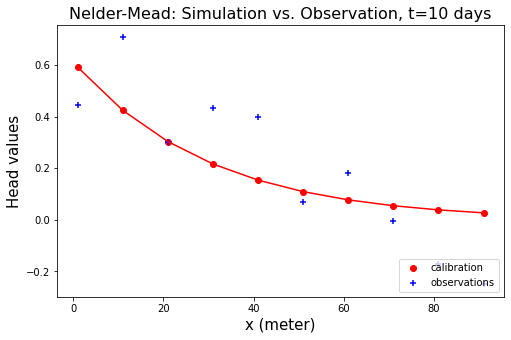

In [34]:
# initialize x and y coordinates
y = h_values_NM[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=10 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

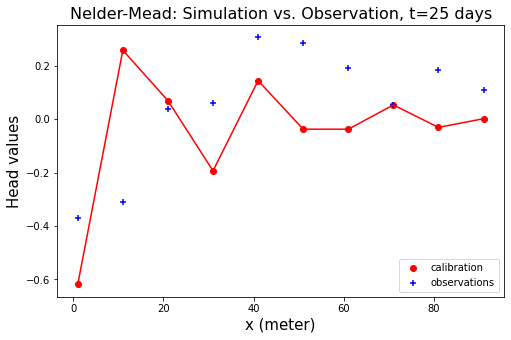

In [35]:
# initialize x and y coordinates
y = h_values_NM[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=25 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

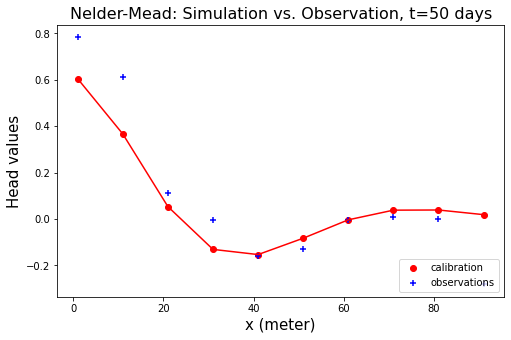

In [36]:
# initialize x and y coordinates
y = h_values_NM[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=50 days", fontsize=16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

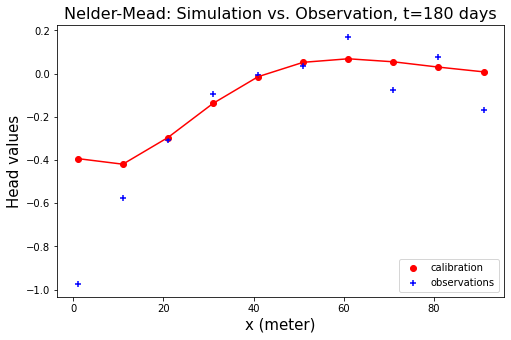

In [37]:
# initialize x and y coordinates
y = h_values_NM[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=180 days", fontsize=16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

In [50]:
times = [7, 10, 25, 50, 180]
distances = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
        
simulation = np.zeros(len(times), len(distances))

D=1
A=1
w=1
for t in times:
    for d in distances:
        calculate_hxt_for_one_variable(D, A, w, d, t)

TypeError: ignored